# Capstone 3: "And Vinyl-ly"

## This notebook is used for testing functions related to getting and cleaning data

## Imports and setting up Spotipy Client

In [1]:
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
from PIL import Image
import requests
import matplotlib.pyplot as plt
from src.get_data import *
import seaborn as sns

plt.style.use('fivethirtyeight')

## Taking a look at my personal vinyl information from Discogs

* They do have an [api](https://www.discogs.com/developers) however for whatever reason I was not able to get my personal collection data, so to make it easy I just downloaded the csv through "**Export My Collection**" option on [my profile](https://www.discogs.com/users/export?w=collection)

In [2]:
# Shows playlists of user, however mine does not seem to be up to date
playlists = sp.user_playlists(128738547)

for playlist in playlists['items']:
    print(playlist['name'])

Skeptical Schematics


In [3]:
albums = pd.read_excel('data/my_albums.ods')
albums['Title'] = albums['Title'].map(str)

In [4]:
# Prints list of the album titles in my albums
for idx, name in enumerate(albums['Title']):
    print(idx, name)

0 The Saga Continues
1 Bon Iver, Bon Iver
2 The Eminem Show
3 An Awesome Wave
4 Ti Amo
5 Rap Album Two
6 Thank You For Today
7 1989
8 None Shall Pass
9 Teenage Dream
10 Greatest Hits 1974-78
11 The Human Condition
12 The Definition
13 Glory Sound Prep
14 Continuum
15 Bob Dylan's Greatest Hits Volume II
16 Illmatic
17 Flower Boy
18 Animals
19 Ye
20 Good News For People Who Love Bad News
21 Boston
22 The Pick Of Destiny
23 Chronicle: 20 Greatest Hits
24 Run The Jewels
25 XXX
26 Some Nights
27 We Don't Need To Whisper
28 Cheshire Cat
29 Camp
30 The Dark Side Of The Moon
31 How To Be A Human Being
32 Currents
33 Leftoverture (Expanded Edition)
34 Aquemini
35 Stankonia
36 Runaround Sue
37 Run The Jewels 2
38 Blink-182
39 Enema Of The State
40 Legends Never Die
41 Professional Rapper
42 I-Empire
43 10 Day
44 Acid Rap
45 Wolf
46 The Now Now
47 Humanz
48 Demon Days
49 Plastic Beach
50 Gorillaz
51 Melophobia
52 Felt 2: A Tribute To Lisa Bonet
53 Overcast! (20 Year Anniversary Remaster)
54 Shado

## Pulling data using the 'get_album_df' function in src/get_data.py

* Ran through this process all files located in the 'data' folder
* Resulting DataFrames ended up being so large that it wouldn't fit in GitHub, so I have them backed up and stored locally in a few places

In [ ]:
#album_df = get_album_df(albums, 'my_vinyls')

# Clustering

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

df_main = pd.read_csv('../my_albums.csv', engine='python')
df_main.head()

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])

X = df_main.select_dtypes(np.number)
cluster_pipeline.fit(X)
y = cluster_pipeline.predict(X)

/home/luke/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


In [6]:
df_main['cluster_groups'] = y.tolist()
df_main.head(1).T

,0
name,Wu-Tang The Saga Continues Intro (feat. RZA)
album,The Saga Continues
year,2017
artist,Wu-Tang Clan
featured_artists,RZA
track_number,1
tracks_on_album,18
explicit,1
duration_ms,91080
popularity,32


In [7]:
df_corr = df_main.corr()
df_corr

,year,track_number,tracks_on_album,explicit,duration_ms,popularity,danceability,energy,key,loudness,...,liveness,valence,tempo,time_signature,track_length,tempo_confidence,end_fade_in,start_fade_out,end_silence_time,cluster_groups
year,1.000000,0.062890,-0.160302,0.290787,-0.090913,0.081955,0.243361,0.026717,-0.025646,0.214342,...,-0.029936,-0.124126,-0.092164,0.003220,-0.090913,-0.114782,-0.003843,-0.083496,-0.145220,-0.356746
track_number,0.062890,1.000000,0.337703,0.079543,0.015190,-0.193237,-0.007634,0.029022,0.044640,0.003490,...,0.037474,-0.013996,-0.033535,-0.015478,0.015190,-0.034302,-0.074637,0.013789,0.026808,-0.034643
tracks_on_album,-0.160302,0.337703,1.000000,0.133359,-0.133282,-0.264606,0.045076,0.132042,0.006260,0.031225,...,0.163727,0.043010,-0.044438,-0.052671,-0.133282,0.013049,-0.060694,-0.128787,-0.112805,0.203637
explicit,0.290787,0.079543,0.133359,1.000000,-0.040144,0.021863,0.326944,0.108374,-0.003263,0.196588,...,0.131720,0.088599,-0.138661,0.084131,-0.040144,-0.101807,-0.089247,-0.024300,-0.261366,-0.180922
duration_ms,-0.090913,0.015190,-0.133282,-0.040144,1.000000,0.201450,-0.009764,0.061658,-0.033150,0.189889,...,-0.073157,-0.158471,0.049029,0.140667,1.000000,-0.016832,-0.005402,0.998210,0.345168,-0.440580
popularity,0.081955,-0.193237,-0.264606,0.021863,0.201450,1.000000,0.063635,-0.029478,-0.019249,0.052013,...,-0.106251,-0.040517,0.120676,0.139037,0.201450,0.036312,0.001688,0.201974,0.055652,-0.171139
danceability,0.243361,-0.007634,0.045076,0.326944,-0.009764,0.063635,1.000000,0.060609,0.035286,0.219912,...,-0.073064,0.321151,-0.147679,0.262357,-0.009764,0.339712,-0.056676,-0.005048,-0.077104,-0.005713
energy,0.026717,0.029022,0.132042,0.108374,0.061658,-0.029478,0.060609,1.000000,0.013562,0.720791,...,0.146171,0.324312,0.108144,0.180312,0.061658,0.259495,-0.139331,0.065620,-0.042622,0.166776
key,-0.025646,0.044640,0.006260,-0.003263,-0.033150,-0.019249,0.035286,0.013562,1.000000,-0.023498,...,-0.042056,0.047978,-0.047302,0.014009,-0.033150,0.033947,-0.013609,-0.033873,0.000840,0.054626
loudness,0.214342,0.003490,0.031225,0.196588,0.189889,0.052013,0.219912,0.720791,-0.023498,1.000000,...,0.015500,0.215144,0.039349,0.184090,0.189889,0.171185,-0.155709,0.196252,-0.039643,-0.048157


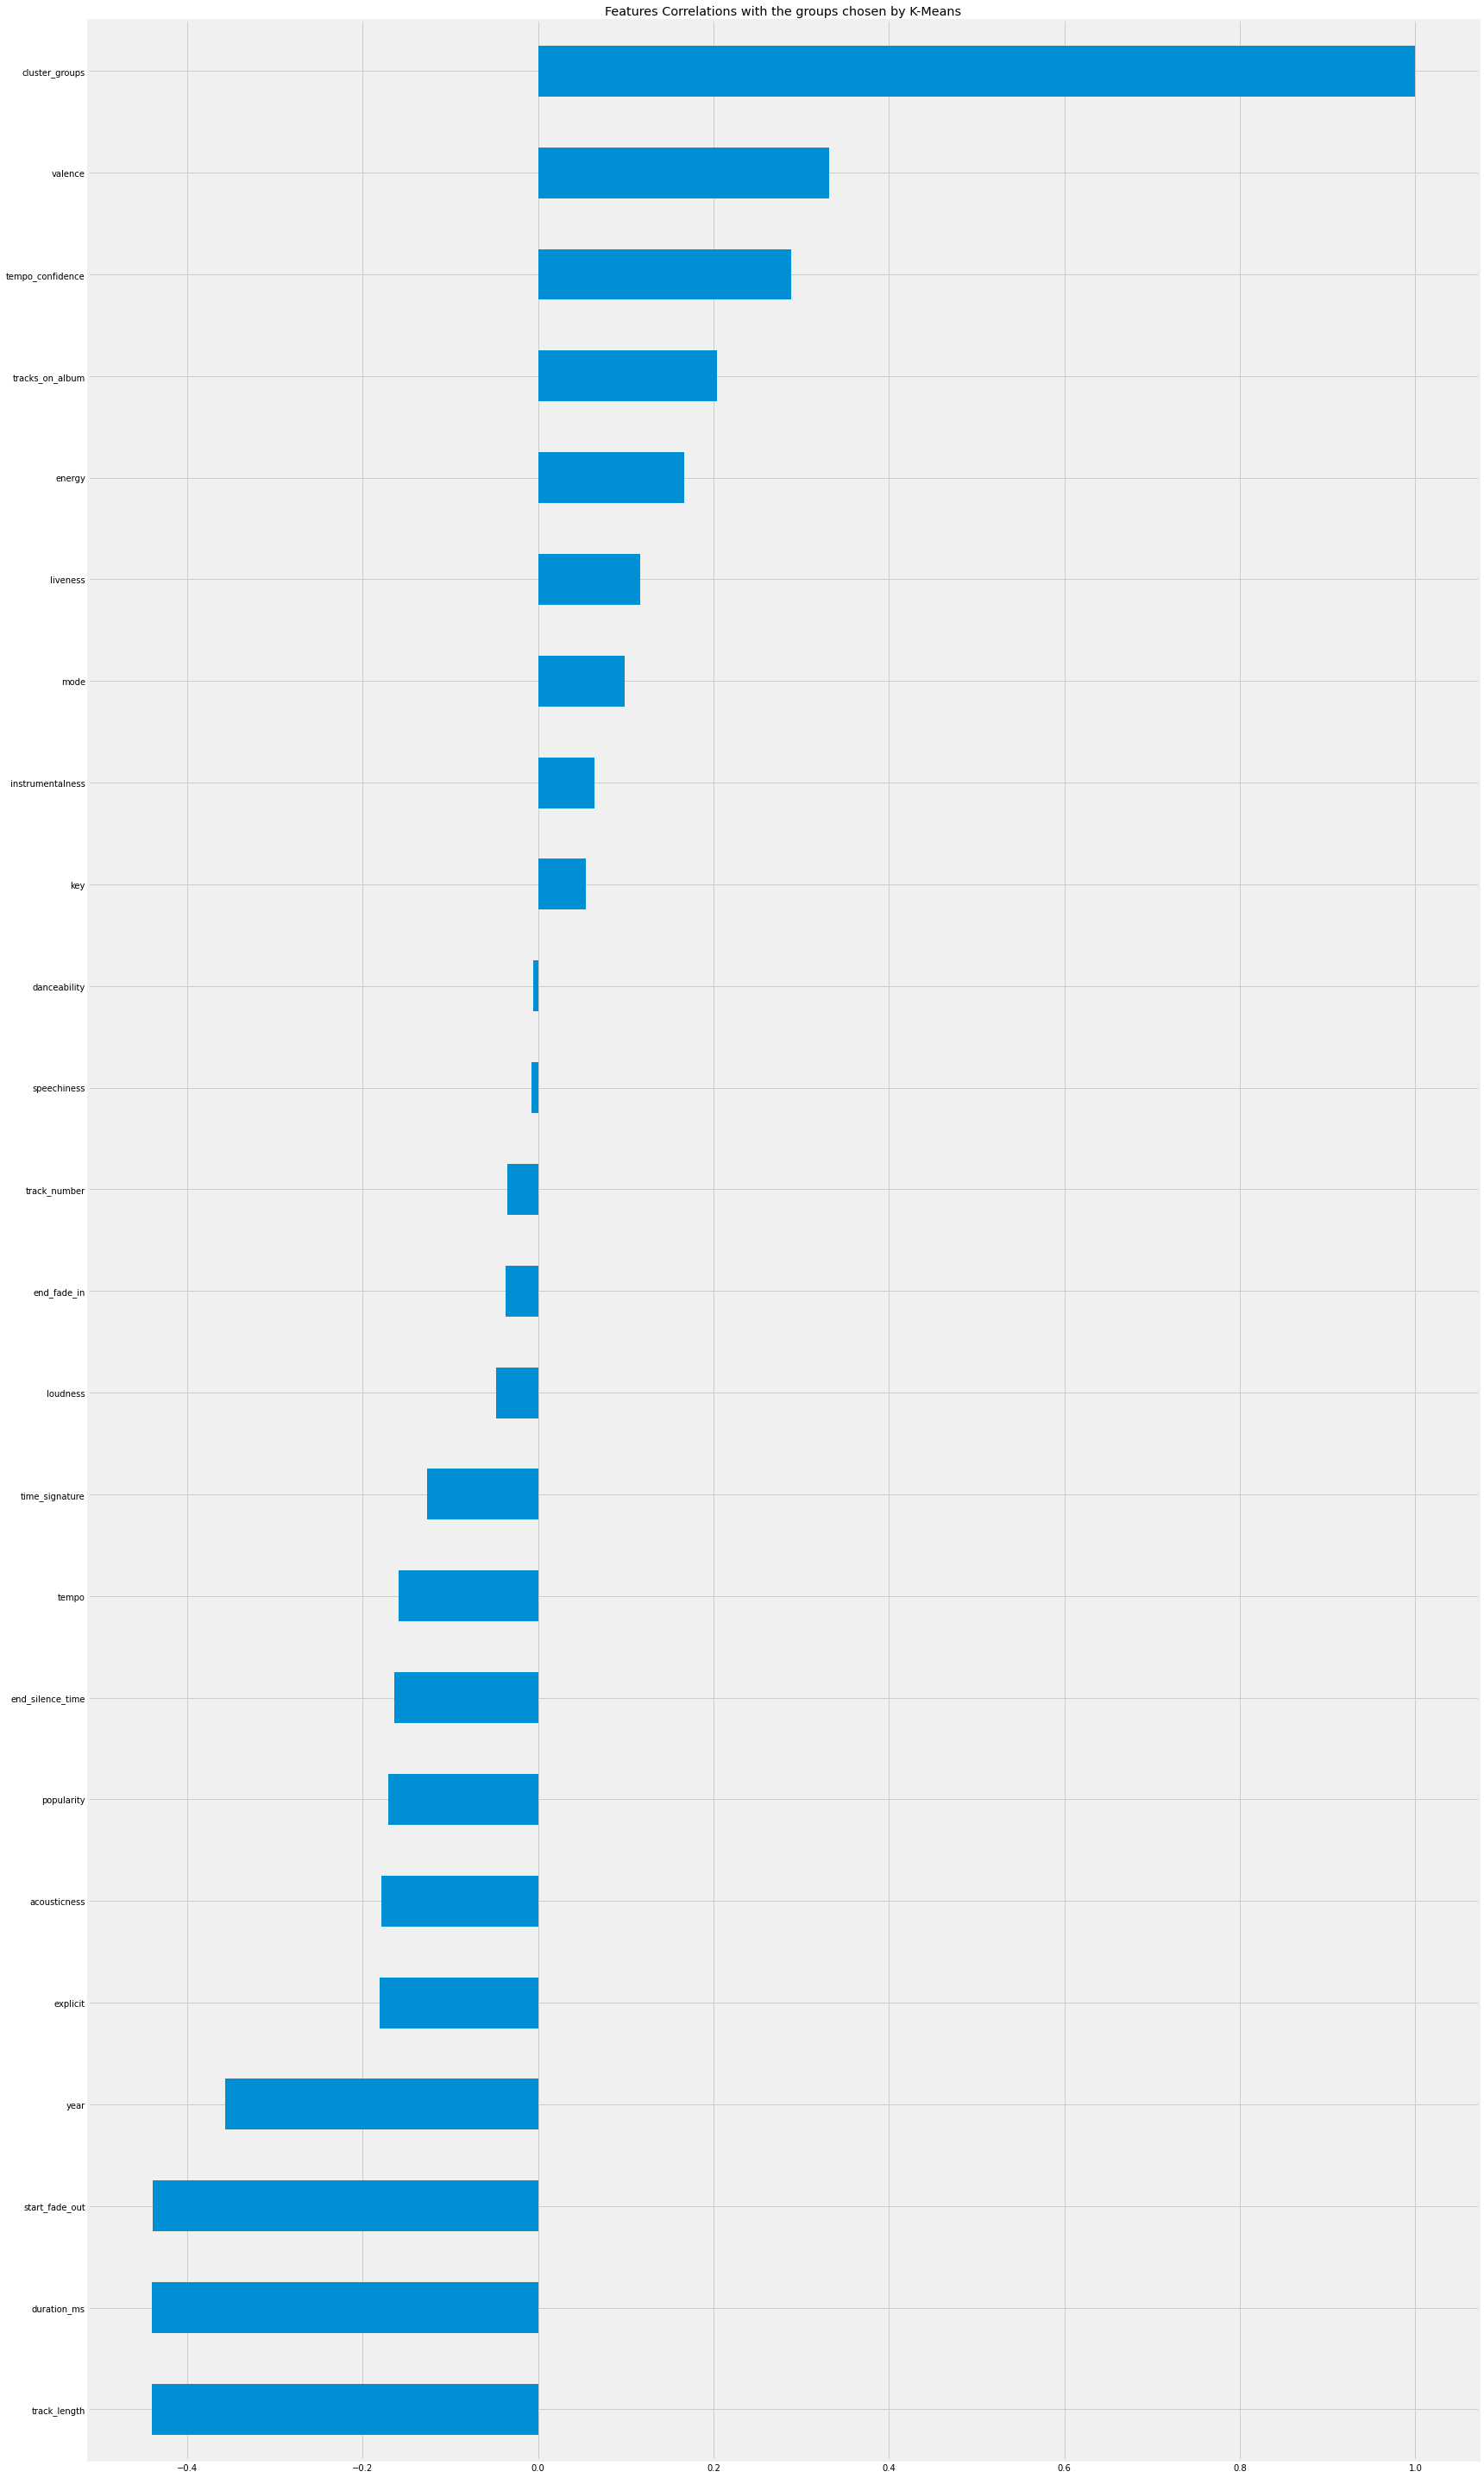

In [8]:
df_corr['cluster_groups'].sort_values(ascending=True).plot(title='Features Correlations with the groups chosen by K-Means', kind='barh', figsize=(24,40))
plt.tight_layout()
#plt.savefig('images/feature_correlation.png')

<AxesSubplot:>

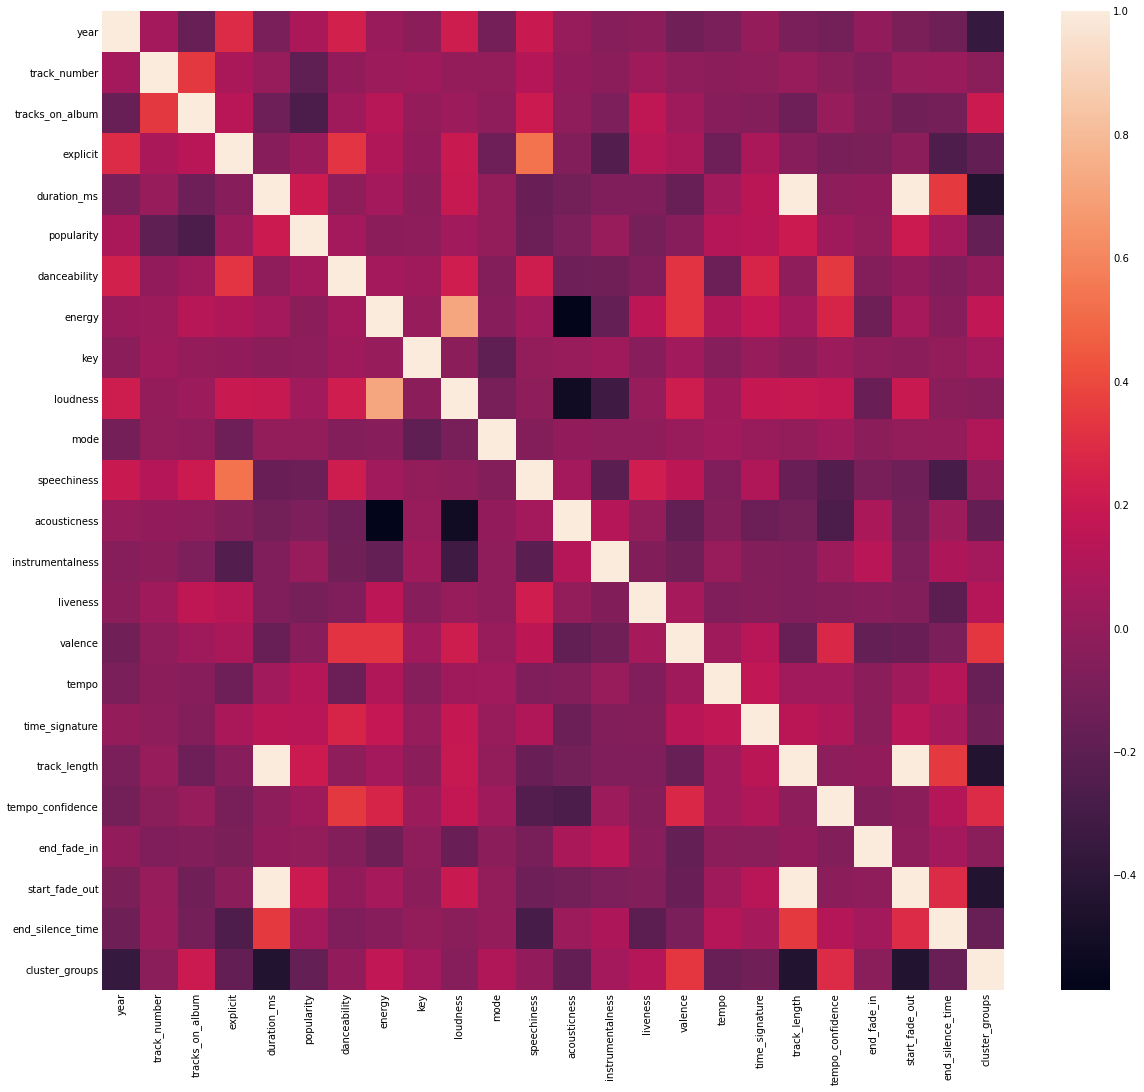

In [9]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_corr, ax=ax)
